In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("C:\\Users\\SWAGA\\Downloads\\air-traffic.csv")

# Check for missing values
missing_values = df.isnull().sum()

# Print the count of missing values per column
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            8
arr_del15              8
carrier_ct             8
weather_ct             8
nas_ct                 8
security_ct            8
late_aircraft_ct       8
arr_cancelled          8
arr_diverted           8
arr_delay              8
carrier_delay          8
weather_delay          8
nas_delay              8
security_delay         8
late_aircraft_delay    8
dtype: int64


In [2]:
# Remove rows with missing values
df_cleaned = df.dropna()

# Check the dataset after dropping missing rows
print(df_cleaned.head())


   year  month carrier       carrier_name airport  \
0  2020     12      9E  Endeavor Air Inc.     ABE   
1  2020     12      9E  Endeavor Air Inc.     ABY   
2  2020     12      9E  Endeavor Air Inc.     AEX   
3  2020     12      9E  Endeavor Air Inc.     AGS   
4  2020     12      9E  Endeavor Air Inc.     ALB   

                                        airport_name  arr_flights  arr_del15  \
0  Allentown/Bethlehem/Easton, PA: Lehigh Valley ...         44.0        3.0   
1             Albany, GA: Southwest Georgia Regional         90.0        1.0   
2           Alexandria, LA: Alexandria International         88.0        8.0   
3        Augusta, GA: Augusta Regional at Bush Field        184.0        9.0   
4                   Albany, NY: Albany International         76.0       11.0   

   carrier_ct  weather_ct  ...  security_ct  late_aircraft_ct  arr_cancelled  \
0        1.63         0.0  ...          0.0              1.25            0.0   
1        0.96         0.0  ...          

In [6]:
# Step 1: Check for missing values
missing_values = df.isnull().sum()
print("\nMissing Values in Each Column Before Imputation:\n", missing_values)

# Step 2: Handle Missing Values

# Identify numerical and categorical columns
numerical_columns = ['arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct', 
                     'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted', 
                     'arr_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

# Impute numerical columns with the median
for col in numerical_columns:
    if col in df.columns:  # Ensure the column exists
        df[col] = df[col].fillna(df[col].median())

# Step 3: Final check to ensure no missing values
missing_values_after = df.isnull().sum()
print("\nMissing Values After Imputation:\n", missing_values_after)

# Optionally, save the cleaned dataset
df.to_csv('air_traffic_cleaned.csv', index=False)

# Preview the cleaned data
print("\nCleaned Data Preview:\n", df.head())





Missing Values in Each Column Before Imputation:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

Missing Values After Imputation:
 year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
a

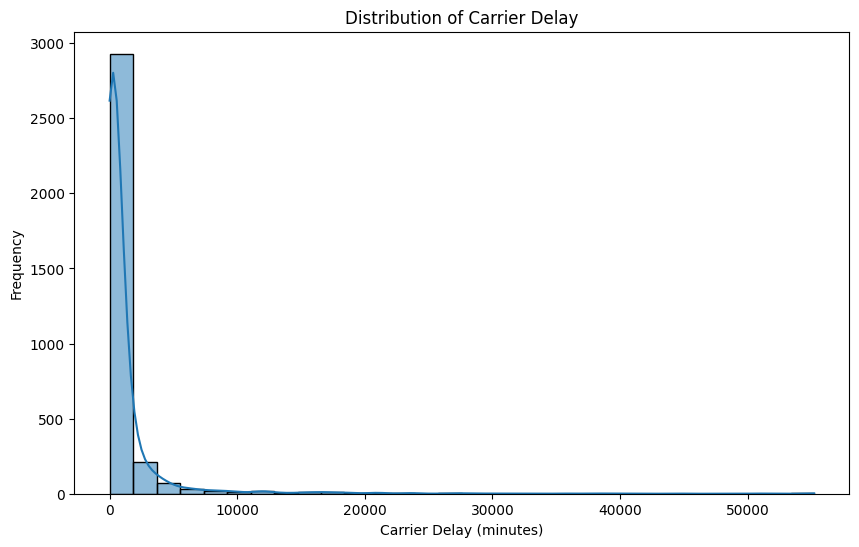

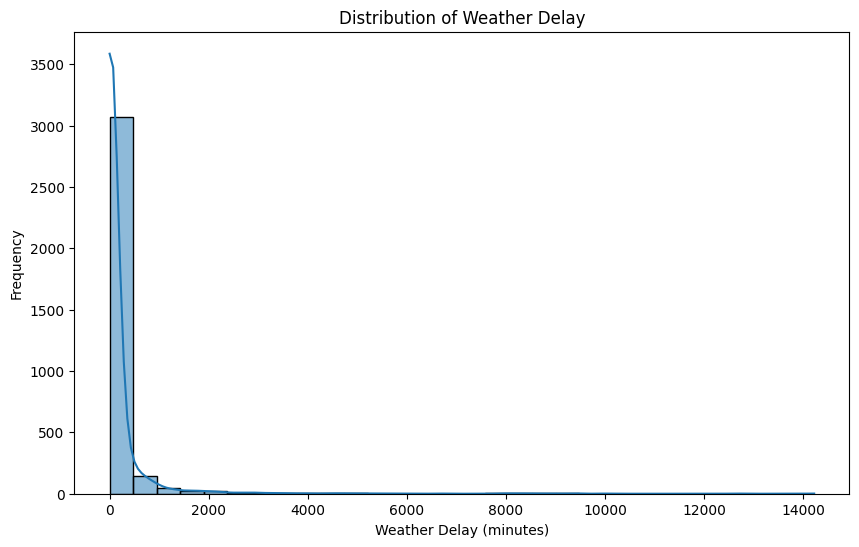

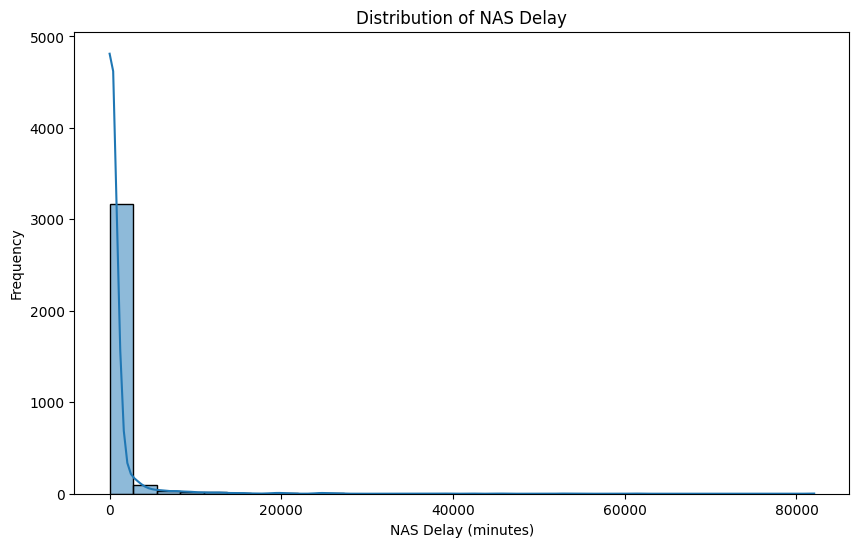

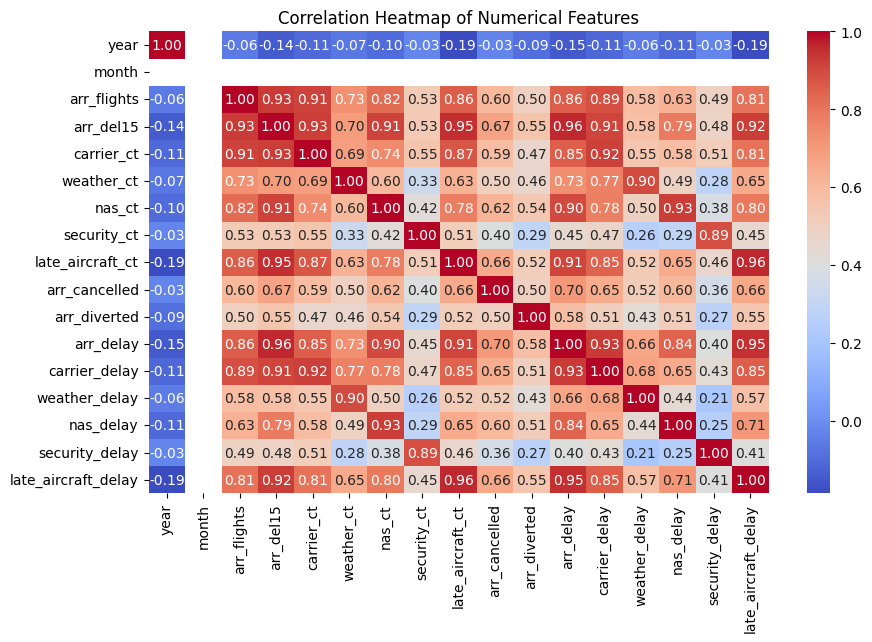

C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


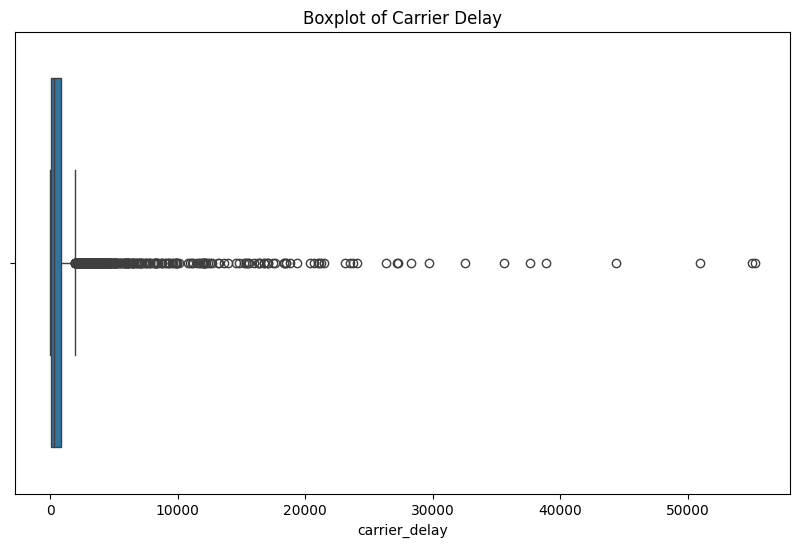

C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


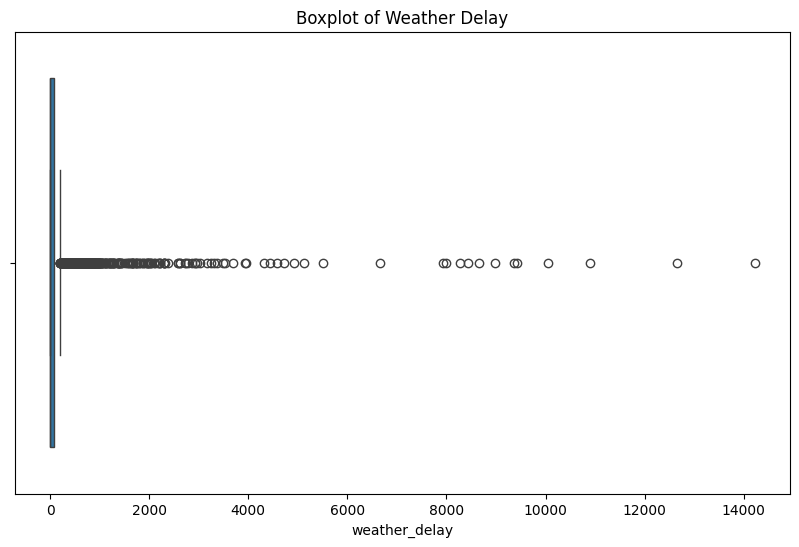

C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


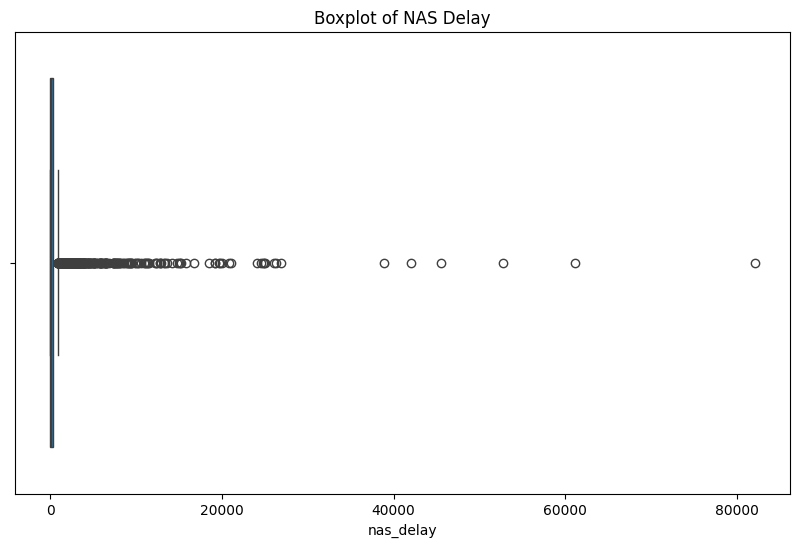

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Visualizing the distribution of different delay columns
plt.figure(figsize=(10, 6))
sns.histplot(df['carrier_delay'], kde=True, bins=30)
plt.title('Distribution of Carrier Delay')
plt.xlabel('Carrier Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['weather_delay'], kde=True, bins=30)
plt.title('Distribution of Weather Delay')
plt.xlabel('Weather Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['nas_delay'], kde=True, bins=30)
plt.title('Distribution of NAS Delay')
plt.xlabel('NAS Delay (minutes)')
plt.ylabel('Frequency')
plt.show()

# 2. Correlation heatmap between numerical features
corr = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# 3. Boxplot to detect outliers in delays
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['carrier_delay'])
plt.title('Boxplot of Carrier Delay')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['weather_delay'])
plt.title('Boxplot of Weather Delay')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x=df['nas_delay'])
plt.title('Boxplot of NAS Delay')
plt.show()


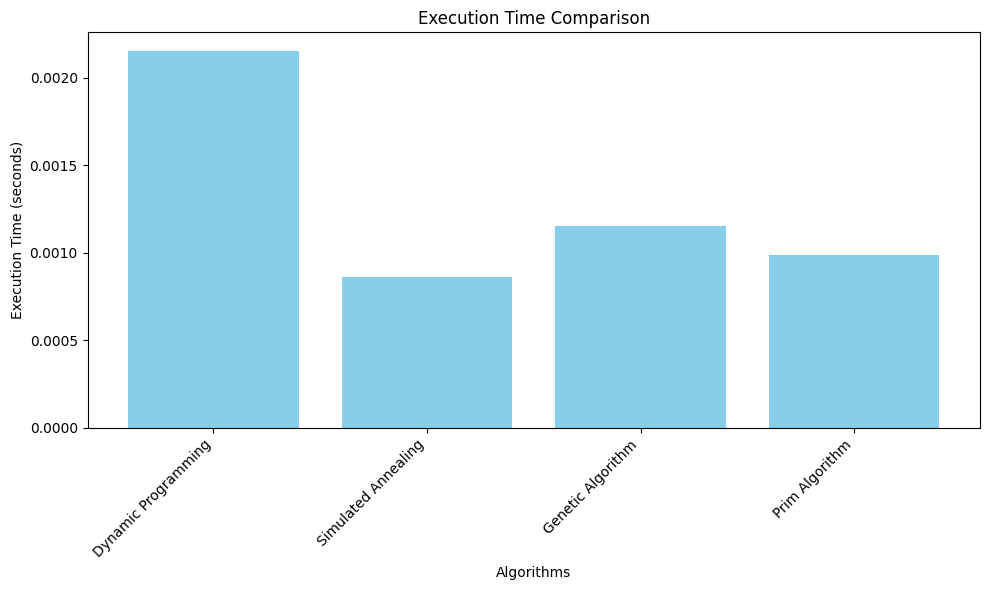

In [5]:
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox
from scipy.optimize import linprog
import networkx as nx
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import random
import time


class AirTrafficApp:
    def __init__(self, root):
        self.root = root
        self.root.title('Air Traffic Delay Optimization')

        # Initialize dataset-related attributes
        self.df = None
        self.numeric_columns = None
        self.optimization_results = {}
        self.execution_times = {}

        # Load dataset button
        self.load_button = tk.Button(self.root, text='Load Dataset', command=self.load_dataset)
        self.load_button.pack()

        # Label to show the file path
        self.file_path_label = tk.Label(self.root, text='No file selected')
        self.file_path_label.pack()

        # Algorithm selection panel
        self.algorithm_label = tk.Label(self.root, text="Select Algorithm:")
        self.algorithm_label.pack()

        # Dropdown for algorithm selection
        self.algorithm_var = tk.StringVar(self.root)
        self.algorithm_var.set("Select Algorithm")
        self.algorithm_dropdown = tk.OptionMenu(self.root, self.algorithm_var, 
                                                 "Dynamic Programming", "Simulated Annealing", 
                                                 "Genetic Algorithm", "Prim Algorithm")
        self.algorithm_dropdown.pack()

        # Execute algorithm button
        self.run_button = tk.Button(self.root, text="Run Algorithm", command=self.run_algorithm)
        self.run_button.pack()

        # Compare all algorithms button
        self.compare_button = tk.Button(self.root, text="Compare Algorithms", command=self.compare_algorithms)
        self.compare_button.pack()

        # Label to display results
        self.result_label = tk.Label(self.root, text='Results will be shown here.')
        self.result_label.pack()

    def load_dataset(self):
        # Allow the user to select a CSV file
        file_path = filedialog.askopenfilename(filetypes=[('CSV Files', '*.csv')])
        self.file_path_label.config(text=file_path)

        # Load the CSV file into a DataFrame
        self.df = pd.read_csv(file_path)

        # Identify numeric columns (exclude non-numeric columns)
        self.numeric_columns = self.df.select_dtypes(include=['number']).columns

        # Apply median imputation only to numeric columns
        self.df[self.numeric_columns] = self.df[self.numeric_columns].fillna(self.df[self.numeric_columns].median())

        self.result_label.config(text='Dataset Loaded and Preprocessed')

    def run_algorithm(self):
        algorithm = self.algorithm_var.get()
        if algorithm == "Dynamic Programming":
            self.run_dynamic_programming()
        elif algorithm == "Simulated Annealing":
            self.run_simulated_annealing()
        elif algorithm == "Genetic Algorithm":
            self.run_genetic_algorithm()
        elif algorithm == "Prim Algorithm":
            self.run_prim_algorithm()
        else:
            messagebox.showwarning("Selection Error", "Please select an algorithm.")

    def run_dynamic_programming(self):
        start_time = time.time()

        delays = self.df['carrier_delay'].tolist()  # Example column
        dp = [0] * len(delays)

        dp[0] = delays[0]
        for i in range(1, len(delays)):
            dp[i] = delays[i] + min(dp[i - 1], dp[i - 2] if i > 1 else float('inf'))

        solution_quality = dp[-1]  # Total minimized delay
        self.optimization_results["Dynamic Programming"] = f"Total Delay Minimized: {solution_quality}"
        self.execution_times["Dynamic Programming"] = time.time() - start_time

    def run_simulated_annealing(self):
        start_time = time.time()

        delays = self.df['carrier_delay'].tolist()  # Example column
        current_solution = random.choice(delays)
        best_solution = current_solution

        for _ in range(1000):  # Simulate optimization iterations
            new_solution = random.choice(delays)
            if new_solution < best_solution:
                best_solution = new_solution

        solution_quality = best_solution  # Total minimized delay
        self.optimization_results["Simulated Annealing"] = f"Total Delay Minimized: {solution_quality}"
        self.execution_times["Simulated Annealing"] = time.time() - start_time

    def run_genetic_algorithm(self):
        start_time = time.time()

        delays = self.df['carrier_delay'].tolist()  # Example column
        population = [random.choice(delays) for _ in range(20)]  # Initial population

        for _ in range(100):  # Simulate genetic algorithm iterations
            new_population = sorted(population)[:10]  # Select top solutions
            population = new_population + [random.choice(delays) for _ in range(10)]  # Mutate

        solution_quality = min(population)  # Total minimized delay
        self.optimization_results["Genetic Algorithm"] = f"Total Delay Minimized: {solution_quality}"
        self.execution_times["Genetic Algorithm"] = time.time() - start_time

    def run_prim_algorithm(self):
        start_time = time.time()

        G = nx.Graph()
        # Add edges with weights (example data)
        G.add_edge('A', 'B', weight=10)
        G.add_edge('B', 'C', weight=15)
        G.add_edge('A', 'C', weight=20)

        mst = nx.minimum_spanning_tree(G)
        solution_quality = sum(weight for _, _, weight in mst.edges(data="weight"))

        self.optimization_results["Prim Algorithm"] = f"Total Weight: {solution_quality}"
        self.execution_times["Prim Algorithm"] = time.time() - start_time

    def compare_algorithms(self):
        comparison_text = "Algorithm Comparison:\n"
        for alg, result in self.optimization_results.items():
            comparison_text += f"{alg}: {result}, Time: {self.execution_times[alg]:.4f} sec\n"

        self.result_label.config(text=comparison_text)

        # Save optimized dataset
        self.df.to_csv('optimized_dataset.csv', index=False)
        messagebox.showinfo("Dataset Saved", "Optimized dataset saved as 'optimized_dataset.csv'.")

        # Plot comparison
        self.plot_comparison()

    def plot_comparison(self):
        algorithms = list(self.optimization_results.keys())
        execution_times = [self.execution_times[alg] for alg in algorithms]

        plt.figure(figsize=(10, 6))
        plt.bar(algorithms, execution_times, color='skyblue')
        plt.title('Execution Time Comparison')
        plt.xlabel('Algorithms')
        plt.ylabel('Execution Time (seconds)')
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()


if __name__ == '__main__':
    root = tk.Tk()
    app = AirTrafficApp(root)
    root.mainloop()


In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time
from ipywidgets import Dropdown, Button, Output, VBox

# Step 1: Load and Preprocess the Dataset
data = pd.read_csv("C:\\Users\\SWAGA\\Downloads\\optimized_dataset.csv")

# Clean and preprocess the data
data = data.dropna(subset=['airport', 'airport_name', 'arr_delay'])
data['airport'] = data['airport'].str.strip()
data['airport_name'] = data['airport_name'].str.strip()

# Subset the data to create a smaller graph with 8-10 nodes
subset_airports = data['airport'].unique()[:8]
subset_data = data[data['airport'].isin(subset_airports)]

# Step 2: Create the Directed Graph
G = nx.DiGraph()
for _, row in subset_data.iterrows():
    G.add_edge(row['airport'], row['airport_name'], weight=row['arr_delay'])

# Helper Functions for Algorithms
def check_node_exists(graph, node):
    if node not in graph:
        raise ValueError(f"Node {node} not found in graph")

def dijkstra_algorithm(graph, source, target):
    check_node_exists(graph, source)
    check_node_exists(graph, target)
    return nx.dijkstra_path(graph, source, target)

def bellman_ford_algorithm(graph, source, target):
    check_node_exists(graph, source)
    check_node_exists(graph, target)
    return nx.bellman_ford_path(graph, source, target)

def bidirectional_dijkstra(graph, source, target):
    check_node_exists(graph, source)
    check_node_exists(graph, target)
    return nx.bidirectional_dijkstra(graph, source, target)[1]

def a_star_algorithm(graph, source, target):
    check_node_exists(graph, source)
    check_node_exists(graph, target)
    return nx.astar_path(graph, source, target, heuristic=lambda u, v: 0)

# Visualization Function
def visualize_shortest_path(graph, path, algorithm_name, source, target):
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(graph)
    nx.draw(graph, pos, with_labels=True, node_size=500, node_color='skyblue', edge_color='gray')
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='green')

    plt.title(f"Shortest Path Using {algorithm_name} ({source} to {target})")
    plt.show()

# Step 3: Compare Algorithms
def compare_algorithms(graph, source, target):
    if source == target:
        raise ValueError("Source and target must be different nodes!")
    
    algorithms = {
        "Dijkstra": dijkstra_algorithm,
        "Bellman-Ford": bellman_ford_algorithm,
        "Bidirectional Dijkstra": bidirectional_dijkstra,
        "A*": a_star_algorithm,
    }

    results = {}
    for name, algo in algorithms.items():
        start_time = time.time()
        try:
            path = algo(graph, source, target)
            time_taken = time.time() - start_time
            path_length = sum(graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
            results[name] = {
                "path": path,
                "path_length": path_length,
                "time_taken": time_taken,
            }
            visualize_shortest_path(graph, path, name, source, target)
        except Exception as e:
            results[name] = {
                "path": None,
                "path_length": None,
                "time_taken": str(e),
            }
            print(f"Error for {name}: {e}")
    return results

# Step 4: Display Results and Plot Comparison
def display_results(results):
    print("\nComparison of Algorithms:\n")
    for algo, result in results.items():
        print(f"Algorithm: {algo}")
        print(f"  Path: {result['path'] if result['path'] else 'No path found'}")
        print(f"  Path Length: {result['path_length'] if result['path_length'] else 'No path length'}")
        print(f"  Time Taken: {result['time_taken']}\n")

def plot_comparison(results):
    algorithms = list(results.keys())
    times = [
        result['time_taken'] if isinstance(result['time_taken'], float) else 0
        for result in results.values()
    ]
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, times, color='skyblue')
    plt.xlabel("Algorithms")
    plt.ylabel("Execution Time (s)")
    plt.title("Algorithm Execution Time Comparison")
    plt.show()

# Step 5: Interactive GUI
output = Output()

def run_comparison(source, target):
    with output:
        output.clear_output()
        if source == target:
            print("Error: Source and target must be different!")
            return
        try:
            print(f"Running comparison from {source} to {target}...")
            results = compare_algorithms(G, source, target)
            display_results(results)
            plot_comparison(results)
        except Exception as e:
            print(f"Error: {e}")

# Dropdown Widgets
source_dropdown = Dropdown(
    options=list(G.nodes),
    value=list(G.nodes)[0],
    description="Source:"
)
target_dropdown = Dropdown(
    options=list(G.nodes),
    value=list(G.nodes)[1],
    description="Target:"
)

# Button to Run Comparison
run_button = Button(description="Run Comparison", button_style="success")
run_button.on_click(lambda _: run_comparison(source_dropdown.value, target_dropdown.value))

# GUI Layout
gui = VBox([source_dropdown, target_dropdown, run_button, output])
display(gui)


In [5]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import time
from ipywidgets import Dropdown, Button, Output, VBox

# Step 1: Load and Preprocess the Dataset
data = pd.read_csv("C:\\Users\\SWAGA\\Downloads\\optimized_dataset.csv")

# Clean and preprocess the data
data = data.dropna(subset=['airport', 'airport_name', 'arr_delay'])
data['airport'] = data['airport'].str.strip()
data['airport_name'] = data['airport_name'].str.strip()

# Subset the data to create a smaller graph with 8-10 nodes
subset_airports = data['airport'].unique()[:8]
subset_data = data[data['airport'].isin(subset_airports)]

# Step 2: Create the Directed Graph
G = nx.DiGraph()
for _, row in subset_data.iterrows():
    G.add_edge(row['airport'], row['airport_name'], weight=row['arr_delay'])

# Helper Functions for Algorithms
def dijkstra_algorithm(graph, source, target):
    return nx.dijkstra_path(graph, source, target)

def bellman_ford_algorithm(graph, source, target):
    return nx.bellman_ford_path(graph, source, target)

def bidirectional_dijkstra(graph, source, target):
    return nx.bidirectional_dijkstra(graph, source, target)[1]

def a_star_algorithm(graph, source, target):
    return nx.astar_path(graph, source, target, heuristic=lambda u, v: 0)

# Visualization Function
def visualize_shortest_path(graph, path, algorithm_name, source, target):
    plt.figure(figsize=(12, 8))
    pos = nx.circular_layout(graph)  # Use cyclic/circular layout
    nx.draw(graph, pos, with_labels=True, node_size=700, node_color='skyblue', edge_color='gray')
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_edge_labels(graph, pos, edge_labels=labels)

    if path:
        path_edges = [(path[i], path[i+1]) for i in range(len(path) - 1)]
        nx.draw_networkx_edges(graph, pos, edgelist=path_edges, edge_color='red', width=2)
        nx.draw_networkx_nodes(graph, pos, nodelist=path, node_color='green')

    plt.title(f"Shortest Path Using {algorithm_name} ({source} to {target})")
    plt.show()

# Step 3: Compare Algorithms
def compare_algorithms(graph, source, target):
    if source == target:
        raise ValueError("Source and target must be different nodes!")
    
    algorithms = {
        "Dijkstra": dijkstra_algorithm,
        "Bellman-Ford": bellman_ford_algorithm,
        "Bidirectional Dijkstra": bidirectional_dijkstra,
        "A*": a_star_algorithm,
    }

    results = {}
    for name, algo in algorithms.items():
        start_time = time.perf_counter_ns()  # Measure time in nanoseconds
        try:
            path = algo(graph, source, target)
            time_taken = (time.perf_counter_ns() - start_time) / 1e6  # Convert to milliseconds
            path_length = sum(graph[u][v]['weight'] for u, v in zip(path[:-1], path[1:]))
            results[name] = {
                "path": path,
                "path_length": path_length,
                "time_taken": time_taken,
            }
            visualize_shortest_path(graph, path, name, source, target)
        except Exception as e:
            results[name] = {
                "path": None,
                "path_length": None,
                "time_taken": str(e),
            }
            print(f"Error for {name}: {e}")
    return results

# Step 4: Display Results and Plot Comparison
def display_results(results):
    print("\nComparison of Algorithms:\n")
    for algo, result in results.items():
        print(f"Algorithm: {algo}")
        print(f"  Path: {result['path'] if result['path'] else 'No path found'}")
        print(f"  Path Length: {result['path_length'] if result['path_length'] else 'No path length'}")
        print(f"  Time Taken: {result['time_taken']} ms\n")

def plot_comparison(results):
    algorithms = list(results.keys())
    times = [
        result['time_taken'] if isinstance(result['time_taken'], float) else 0
        for result in results.values()
    ]
    plt.figure(figsize=(10, 6))
    plt.bar(algorithms, times, color='skyblue')
    plt.xlabel("Algorithms")
    plt.ylabel("Execution Time (ms)")
    plt.title("Algorithm Execution Time Comparison")
    plt.show()

# Step 5: Interactive GUI
output = Output()

def run_comparison(source, target):
    with output:
        output.clear_output()
        if source == target:
            print("Error: Source and target must be different!")
            return
        try:
            print(f"Running comparison from {source} to {target}...")
            results = compare_algorithms(G, source, target)
            display_results(results)
            plot_comparison(results)
        except Exception as e:
            print(f"Error: {e}")

# Dropdown Widgets
source_dropdown = Dropdown(
    options=list(G.nodes),
    value=list(G.nodes)[0],
    description="Source:"
)
target_dropdown = Dropdown(
    options=list(G.nodes),
    value=list(G.nodes)[1],
    description="Target:"
)

# Button to Run Comparison
run_button = Button(description="Run Comparison", button_style="success")
run_button.on_click(lambda _: run_comparison(source_dropdown.value, target_dropdown.value))

# GUI Layout
gui = VBox([source_dropdown, target_dropdown, run_button, output])
display(gui)


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\SWAGA\\Downloads\\optimized_dataset.csv'

In [1]:
import pandas as pd
import numpy as np
import dash
from dash import dcc, html, Input, Output, State
import plotly.graph_objects as go

# Initialize initial dataset
data = {
    'year': [2020, 2020, 2020, 2020, 2020],
    'month': [12, 12, 12, 12, 12],
    'carrier': ['9E', '9E', '9E', '9E', '9E'],
    'carrier_name': ['Endeavor Air Inc.', 'Endeavor Air Inc.', 'Endeavor Air Inc.', 'Endeavor Air Inc.', 'Endeavor Air Inc.'],
    'airport': ['ABE', 'ABY', 'AEX', 'AGS', 'ALB'],
    'arr_flights': [44.0, 90.0, 88.0, 184.0, 76.0],
    'arr_del15': [3.0, 1.0, 8.0, 9.0, 11.0],
    'arr_delay': [89.0, 23.0, 338.0, 508.0, 692.0],
    'carrier_delay': [56.0, 22.0, 265.0, 192.0, 398.0],
    'weather_delay': [0.0, 0.0, 0.0, 0.0, 0.0],
    'nas_delay': [3.0, 1.0, 45.0, 92.0, 178.0],
    'security_delay': [0.0, 0.0, 0.0, 0.0, 0.0],
    'late_aircraft_delay': [30.0, 0.0, 28.0, 224.0, 116.0]
}
df = pd.DataFrame(data)

# Calculate total delay
def calculate_total_delay(df):
    df['total_delay'] = (
        df['arr_delay'] +
        df['carrier_delay'] +
        df['weather_delay'] +
        df['nas_delay'] +
        df['security_delay'] +
        df['late_aircraft_delay']
    )
    return df

df = calculate_total_delay(df)

# Dynamic Programming for delay minimization
def minimize_delay_dp(flights, max_delay):
    n = len(flights)
    max_delay = int(max_delay)
    dp = np.zeros((n + 1, max_delay + 1))

    for i in range(1, n + 1):
        for j in range(max_delay + 1):
            if flights.iloc[i - 1]['total_delay'] <= j:
                dp[i, j] = max(
                    dp[i - 1, j],
                    dp[i - 1, j - int(flights.iloc[i - 1]['total_delay'])] + flights.iloc[i - 1]['total_delay']
                )
            else:
                dp[i, j] = dp[i - 1, j]

    selected_flights = []
    w = max_delay
    for i in range(n, 0, -1):
        if dp[i, w] != dp[i - 1, w]:
            selected_flights.append(flights.iloc[i - 1])
            w -= int(flights.iloc[i - 1]['total_delay'])

    return selected_flights, dp[n, max_delay]

# Greedy Algorithm for prioritization
def greedy_priority(flights):
    sorted_flights = flights.sort_values(by='total_delay', ascending=False)
    return sorted_flights

# Initialize Dash app
app = dash.Dash(__name__)
app.title = "Real-Time Flight Delay Analysis"

# App layout
app.layout = html.Div([
    html.H1("Real-Time Flight Delay Analysis", style={'text-align': 'center'}),
    dcc.Graph(id='delay-graph'),
    html.Div([
        html.H3("Add Real-Time Flight Data"),
        html.Div([
            html.Label("Airport: "),
            dcc.Input(id='input-airport', type='text', placeholder='Enter airport code'),
            html.Label("Arrival Delay: "),
            dcc.Input(id='input-arr-delay', type='number', placeholder='Enter arrival delay (min)'),
            html.Label("Carrier Delay: "),
            dcc.Input(id='input-carrier-delay', type='number', placeholder='Enter carrier delay (min)'),
            html.Label("NAS Delay: "),
            dcc.Input(id='input-nas-delay', type='number', placeholder='Enter NAS delay (min)'),
            html.Label("Late Aircraft Delay: "),
            dcc.Input(id='input-late-delay', type='number', placeholder='Enter late aircraft delay (min)')
        ], style={'padding': '10px'}),
        html.Button("Submit Flight Data", id='submit-button', n_clicks=0)
    ], style={'width': '50%', 'margin': 'auto', 'padding': '20px'}),
    html.Div(id='analysis-output', style={'padding': '20px'}),
])

# Update graph and analysis on new flight data
@app.callback(
    [Output('delay-graph', 'figure'),
     Output('analysis-output', 'children')],
    [Input('submit-button', 'n_clicks')],
    [State('input-airport', 'value'),
     State('input-arr-delay', 'value'),
     State('input-carrier-delay', 'value'),
     State('input-nas-delay', 'value'),
     State('input-late-delay', 'value')]
)
def update_analysis(n_clicks, airport, arr_delay, carrier_delay, nas_delay, late_delay):
    global df
    if n_clicks > 0 and airport and arr_delay and carrier_delay and nas_delay and late_delay is not None:
        new_flight = {
            'year': 2021,
            'month': 11,
            'carrier': 'N/A',
            'carrier_name': 'Real-Time Data',
            'airport': airport,
            'arr_flights': 1,
            'arr_del15': 1,
            'arr_delay': arr_delay,
            'carrier_delay': carrier_delay,
            'weather_delay': 0,
            'nas_delay': nas_delay,
            'security_delay': 0,
            'late_aircraft_delay': late_delay
        }
        df = pd.concat([df, pd.DataFrame([new_flight])], ignore_index=True)
        df = calculate_total_delay(df)

    # Analysis
    max_delay = int(df['total_delay'].sum())
    selected_flights_dp, total_delay_dp = minimize_delay_dp(df, max_delay)
    sorted_flights_greedy = greedy_priority(df)

    # Create graph
    fig = go.Figure()
    fig.add_trace(go.Bar(
        x=df['airport'],
        y=df['total_delay'],
        name='Total Delays',
        marker_color='indianred'
    ))
    fig.update_layout(title="Airport Delays Analysis",
                      xaxis_title="Airport",
                      yaxis_title="Total Delay (Minutes)")

    # Output text
    analysis_text = f"""
    Dynamic Programming Total Delay: {total_delay_dp} minutes
    Top Priority Flight (Greedy): {sorted_flights_greedy.iloc[0]['airport']} 
    with Delay {sorted_flights_greedy.iloc[0]['total_delay']} minutes
    """

    return fig, analysis_text

#

    # Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=9000)  # Change port to 8040or any available port


In [2]:
!pip install pandas networkx scikit-learn plotly dash
import pandas as pd
import networkx as nx
import numpy as np
import plotly.graph_objs as go
from sklearn.ensemble import RandomForestRegressor
from dash import Dash, dcc, html, Input, Output
from queue import PriorityQueue  # For A* search

# Simulated dataset (you should replace this with actual real-time data)
data = {
    'origin': ['ABY', 'ATL', 'LAX', 'ORD', 'DFW', 'JFK', 'MIA'],
    'destination': ['ATL', 'LAX', 'ORD', 'DFW', 'JFK', 'MIA', 'ABY'],
    'arr_delay': [30, 45, 50, 40, 60, 15, 20]  # Minutes of delay
}
df = pd.DataFrame(data)

# Create a graph
G = nx.DiGraph()
for _, row in df.iterrows():
    G.add_edge(row['origin'], row['destination'], weight=row['arr_delay'])

# Function to find shortest path using Dijkstra
def dijkstra_path_and_delay(G, source, destination):
    if nx.has_path(G, source, destination):
        path = nx.dijkstra_path(G, source, destination, weight='weight')
        total_delay = nx.dijkstra_path_length(G, source, destination, weight='weight')
        return path, total_delay
    return None, None

# A* Algorithm for finding the shortest path
def a_star_path_and_delay(G, source, destination, heuristic=None):
    def default_heuristic(u, v):
        return 0  # No heuristic by default
    heuristic = heuristic or default_heuristic
    
    visited = set()
    queue = PriorityQueue()
    queue.put((0, source, [source], 0))  # (priority, current_node, path, delay_so_far)
    
    while not queue.empty():
        _, current, path, delay_so_far = queue.get()
        if current in visited:
            continue
        visited.add(current)
        
        if current == destination:
            return path, delay_so_far
        
        for neighbor in G.neighbors(current):
            weight = G[current][neighbor]['weight']
            priority = delay_so_far + weight + heuristic(neighbor, destination)
            queue.put((priority, neighbor, path + [neighbor], delay_so_far + weight))
    
    return None, None

# Train a Random Forest Regression model for delay prediction
def train_delay_prediction_model(df):
    airport_codes = list(set(df['origin'].tolist() + df['destination'].tolist()))
    airport_dict = {code: idx for idx, code in enumerate(airport_codes)}
    X = df[['origin', 'destination']].applymap(lambda x: airport_dict[x])
    y = df['arr_delay']
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X, y)
    return model, airport_dict

# Predict delay using the trained model
def predict_delay(model, airport_dict, origin, destination):
    origin_idx = airport_dict[origin]
    dest_idx = airport_dict[destination]
    return model.predict([[origin_idx, dest_idx]])[0]

# Dash for Visualization
app = Dash(__name__)

# Dash Layout
app.layout = html.Div([
    html.H1("Air Traffic Delay Management", style={'text-align': 'center'}),
    dcc.Dropdown(
        id='source-dropdown',
        options=[{'label': airport, 'value': airport} for airport in G.nodes],
        value='ABY',
        style={'width': '48%', 'display': 'inline-block'}
    ),
    dcc.Dropdown(
        id='destination-dropdown',
        options=[{'label': airport, 'value': airport} for airport in G.nodes],
        value='ATL',
        style={'width': '48%', 'display': 'inline-block'}
    ),
    html.Br(),
    html.Div(id='path-output'),
    html.Div(id='delay-output'),
    dcc.Graph(id='delay-graph')
])

# Callback to handle inputs and provide outputs
@app.callback(
    [Output('path-output', 'children'),
     Output('delay-output', 'children'),
     Output('delay-graph', 'figure')],
    [Input('source-dropdown', 'value'),
     Input('destination-dropdown', 'value')]
)
def update_output(source, destination):
    # Dijkstra Algorithm
    path_dijkstra, delay_dijkstra = dijkstra_path_and_delay(G, source, destination)
    
    # A* Search with heuristic (no heuristic for now)
    path_a_star, delay_a_star = a_star_path_and_delay(G, source, destination)
    
    # Train the machine learning model
    model, airport_dict = train_delay_prediction_model(df)
    
    # Predict the delay
    predicted_delay = predict_delay(model, airport_dict, source, destination)
    
    # Prepare output strings
    dijkstra_text = (f"Dijkstra: Shortest path {path_dijkstra}, "
                     f"Total Delay: {delay_dijkstra} minutes.") if path_dijkstra else "Dijkstra: No path found."
    
    a_star_text = (f"A*: Shortest path {path_a_star}, "
                   f"Total Delay: {delay_a_star} minutes.") if path_a_star else "A*: No path found."
    
    prediction_text = f"Predicted Delay (ML): {predicted_delay:.2f} minutes."
    
    # Create visualization
    fig = go.Figure([
        go.Bar(name="Dijkstra Delay", x=[source, destination], y=[delay_dijkstra, 0] if delay_dijkstra else [0, 0]),
        go.Bar(name="Predicted Delay", x=[source, destination], y=[0, predicted_delay])
    ])
    fig.update_layout(title="Delay Comparison", xaxis_title="Airports", yaxis_title="Delay (Minutes)", barmode='group')
    
    return dijkstra_text, a_star_text + " " + prediction_text, fig

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True, port=8056)  # Change the port to an unused one


DEPRECATION: Loading egg at c:\program files\python312\lib\site-packages\vboxapi-1.0-py3.12.egg is deprecated. pip 25.1 will enforce this behaviour change. A possible replacement is to use pip for package installation. Discussion can be found at https://github.com/pypa/pip/issues/12330

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable


C:\Users\SWAGA\AppData\Local\Temp\ipykernel_27420\3643095492.py:61: FutureWarning:

DataFrame.applymap has been deprecated. Use DataFrame.map instead.

C:\Users\SWAGA\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names

